# Solving the Problem of Overfitting

## 1. The problem of overfitting

Throughout the past notebooks we have seen two different machine learning techniques:

1. Linear regression: For learning problems whose output is real valued.
2. Logistic regression: For learning problems whose output is discrete.

We've seen how to apply both of them having good results. However, more often than desired, these algorithms run into a problem called **overfitting**. Let's introduce the problem through an example.

**Example.** Let's consider a linear regression problem with the following data points:

In [12]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
# Data
x = np.array([1, 1.5, 2, 3, 5])
y = np.array([1, 2, 3, 3.5, 4])

[0, 6, 0, 5]

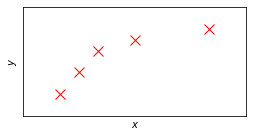

In [28]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10)
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])

Now, let's fit the following hypotheses to these data:

$$
h^{1}_{\theta}(x) = \theta_0 + \theta_1 x,
$$

$$
h^{2}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2,
$$

and

$$
h^{3}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4.
$$

Let's find $\theta$ for each hypothesis using the normal equation:

In [18]:
X1 = np.concatenate([np.array([x**i]).T for i in range(2)], axis=1)
theta1 = np.linalg.solve(X1.T.dot(X1), X1.T.dot(y))
theta1

array([1.0125, 0.675 ])

In [19]:
X2 = np.concatenate([np.array([x**i]).T for i in range(3)], axis=1)
theta2 = np.linalg.solve(X2.T.dot(X2), X2.T.dot(y))
theta2

array([-1.07295285,  2.48362283, -0.29528536])

In [21]:
X3 = np.concatenate([np.array([x**i]).T for i in range(5)], axis=1)
theta3 = np.linalg.solve(X3.T.dot(X3), X3.T.dot(y))
theta3

array([ 2.21428572, -5.53571429,  6.05952381, -1.92857143,  0.19047619])

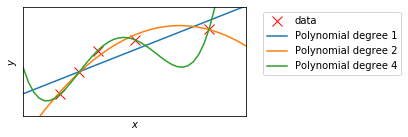

In [27]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10, label='data')
x_fit = np.linspace(0, 7)
X1_fit = np.concatenate([np.array([x_fit**i]).T for i in range(2)], axis=1)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X3_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y1 = X1_fit.dot(theta1)
y2 = X2_fit.dot(theta2)
y3 = X3_fit.dot(theta3)
plt.plot(x_fit, y1, label='Polynomial degree 1')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.plot(x_fit, y3, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>